In [26]:
import cv2
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

In [27]:
i = misc.ascent()
print(type(i), i.shape)

<class 'numpy.ndarray'> (512, 512)


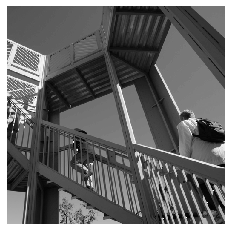

In [28]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [29]:
i_transformed = np.copy(i)
print(type(i_transformed), i_transformed.shape)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

<class 'numpy.ndarray'> (512, 512)


In [63]:
#filters

#filters =[[0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
#filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

weight = 1

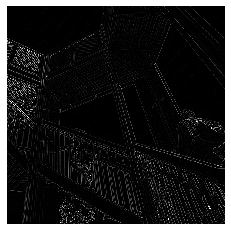

In [64]:
### convolution ###
for x in range(1, size_x-1):
    for y in range(1, size_y-1):
        conv = 0.0
        
        conv = conv+(i[x-1, y-1]*filters[0][0])
        conv = conv+(i[x, y-1]*filters[0][1])
        conv = conv+(i[x+1, y-1]*filters[0][2])
        conv = conv+(i[x-1, y]*filters[1][0])
        conv = conv+(i[x, y]*filters[1][1])
        conv = conv+(i[x+1, y]*filters[1][2])
        conv = conv+(i[x-1, y+1]*filters[2][0])
        conv = conv+(i[x, y+1]*filters[2][1])
        conv = conv+(i[x+1, y+1]*filters[2][2])
        conv = conv*weight
        
        if conv < 0:
            conv = 0
        if conv > 255:
            conv = 255
        i_transformed[x, y] = conv
        
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.axis('off')
plt.show()

(256, 256)


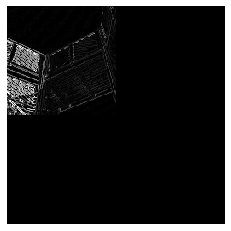

In [65]:
### max pooling ####

new_x = int(size_x/2)
new_y = int(size_y/2)

newImage = np.zeros((new_x, new_y))
print(newImage.shape)

for x in range(1, new_x-1):
    for y in range(1, new_y-1):
        pixels = []
        pixels.append(i_transformed[x, y])
        pixels.append(i_transformed[x+1, y])
        pixels.append(i_transformed[x, y+1])
        pixels.append(i_transformed[x+1, y+1])
        newImage[int(x/2), int(y/2)] = max(pixels)
        
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.axis('off')
plt.show()